# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
# def apply_svd_custom(X_train, X_test, n_components):
#     raise NotImplementedError("Your implementation here...")



def apply_svd_custom(X_train, X_test, n_components):
    """
    Apply SVD to X_train and X_test, reducing to n_components dimensions.

    Parameters:
        X_train: Training data, shape (n_samples_train, n_features)
        X_test: Test data, shape (n_samples_test, n_features)
        n_components: Number of singular values/components to keep

    Returns:
        X_train_reduced: Transformed training data
        X_test_reduced: Transformed test data
        U: Left singular vectors
        S: Singular values
        Vt: Right singular vectors (transposed)
    """
    # Center the training data
    X_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_mean
    X_test_centered = X_test - X_mean  # Important: use training mean to center test data

    # Compute covariance matrix (size: n_features x n_features)
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / (X_train_centered.shape[0] - 1)

    # Compute eigenvalues and eigenvectors of the covariance matrix
    eigvals, eigvecs = np.linalg.eigh(covariance_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    # Compute singular values
    singular_values = np.sqrt(eigvals)

    # Keep the top n_components
    V = eigvecs[:, :n_components]  # Right singular vectors (n_features x n_components)
    S = singular_values[:n_components]

    # Project data onto the principal components
    X_train_reduced = np.dot(X_train_centered, V)
    X_test_reduced = np.dot(X_test_centered, V)

    # Compute U (left singular vectors)
    U = np.dot(X_train_centered, V) / S

    # Vt is the transpose of V
    Vt = V.T

    return X_train_reduced, X_test_reduced, U, S, Vt


## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [5]:
svd_components = [5, 20, 50, 100, 200, 500, 784]  # 784 is the original dimension

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"\nApplying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, U, S, Vt = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

    # Store the results
    results.append({'n_components': n_components, 'accuracy': accuracy, 'training_time': training_time})


Training models with different levels of SVD preprocessing...

Applying custom SVD with 5 components...


<ipython-input-2-2f910e565055>:39: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigvals)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 5, Accuracy: 0.6796, Training time: 0.8184 seconds

Applying custom SVD with 20 components...


<ipython-input-2-2f910e565055>:39: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigvals)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8784, Training time: 3.4233 seconds

Applying custom SVD with 50 components...


<ipython-input-2-2f910e565055>:39: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigvals)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9080, Training time: 13.9221 seconds

Applying custom SVD with 100 components...


<ipython-input-2-2f910e565055>:39: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigvals)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 46.4861 seconds

Applying custom SVD with 200 components...


<ipython-input-2-2f910e565055>:39: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigvals)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 97.0795 seconds

Applying custom SVD with 500 components...


<ipython-input-2-2f910e565055>:39: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigvals)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 344.7229 seconds

Applying custom SVD with 784 components...


<ipython-input-2-2f910e565055>:39: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigvals)
<ipython-input-2-2f910e565055>:50: RuntimeWarning: invalid value encountered in divide
  U = np.dot(X_train_centered, V) / S
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9207, Training time: 579.3630 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


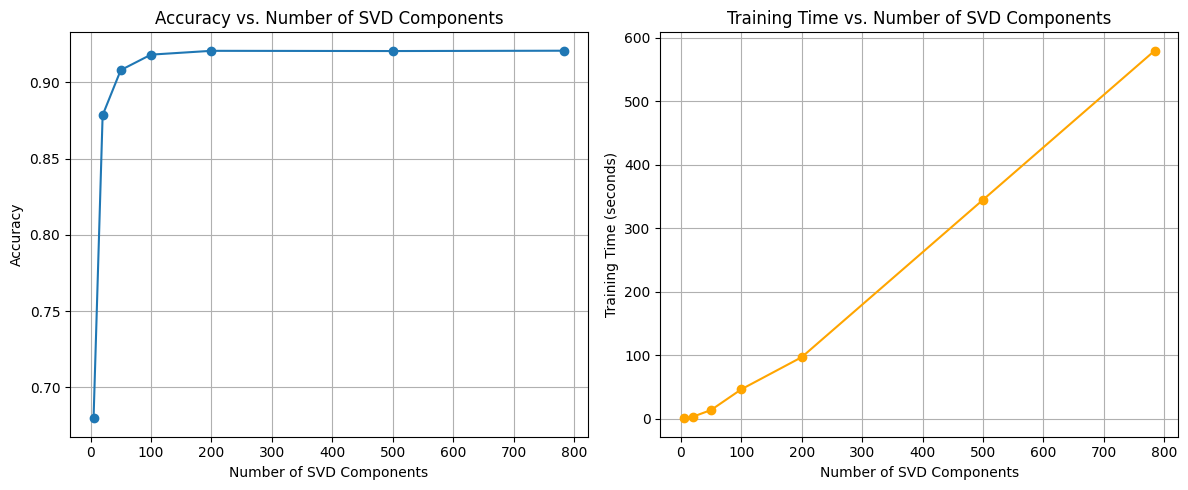

In [6]:
# Extract results for plotting
components = [res['n_components'] for res in results]
accuracies = [res['accuracy'] for res in results]
training_times = [res['training_time'] for res in results]

# Plot Accuracy vs. Number of Components
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Training Time vs. Number of Components
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o', color='orange')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()


## Part 6: Analyze / Conclusion

YOUR ANSWER:

Analyzing the results, we find that increasing the number of SVD components significantly improves model accuracy up to a certain point. Accuracy rose sharply from 67.96% with 5 components to 90.80% with 50 components. However, beyond 50 components, the improvements slowed, reaching 92.07% at 784 components. Concurrently, training time increased exponentially—from 0.82 seconds with 5 components to 579.36 seconds with 784 components. This demonstrates that while more components can enhance accuracy, they also greatly increase computational cost.

The initial rapid increase in accuracy occurs because the first few SVD components capture the most critical information in the data—the essential patterns that distinguish different digits. As we add more components, the model accesses more detailed and nuanced features, further refining its predictions. However, after a certain point, additional components contribute less to performance because they capture less significant variations or noise. Thus, increasing the number of components beyond 50 to 100 offers minimal accuracy gains while substantially increasing training time. Understanding this balance helps in selecting an optimal number of components that maximize accuracy without unnecessary computational expense.